Making the model

In [1]:
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.insert(0, '../src') # way to get access to the scr path
from data_frame_work import DataFrameWork
from regressor_models import RegressorModels
import pickle

# calling the data frame with the information of the csv file
immo = DataFrameWork.get_data_frame()
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [2]:
# Getting the X and y parameters
X, y = RegressorModels.get_X_y(immo)

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


In [3]:
# Splitting the X and y parameters with the train and test information in
X_train, X_test, y_train, y_test = RegressorModels.get_train_test(X, y)

print(X_train.shape)
print(X_test.shape)

(7378, 85)
(3162, 85)


In [4]:
# making instantiation of DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
# fitting the model
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [5]:
# predition with training data 
pred_train_tree= dtree.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, pred_train_tree)

print('Mean squared error in train prediction:', mse)
print('Score in train prediction', score)

# predition with test data
pred_test_tree= dtree.predict(X_test)
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_test, pred_test_tree)

print('Mean squared error in test prediction:', mse) 
print('Score in test prediction', score)

Mean squared error in train prediction: 127935200043.23785
Score in train prediction 0.23970366052027847
Mean squared error in test prediction: 126351917571.37051
Score in test prediction 0.21583749493361715


In [6]:
# Fit the regression tree 'dtree1' and 'dtree2' to try the max_depth parameter
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

# Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 

In [7]:
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, tr1)

# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('Mean squared error in train prediction:', mse) 
print('Score in train prediction', score)

# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_test, y1)
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('Mean squared error in test prediction:', mse) 
print('Score in test prediction', score)

Mean squared error in train prediction: 104725535191.86075
Score in train prediction 0.3776346069766824
Mean squared error in test prediction: 109760224483.86674
Score in test prediction 0.3188084973914188


In [8]:
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, tr2)

# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print('Mean squared error in train prediction:', mse) 
print('Score in train prediction', score)

# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_test, y2)
# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print('Mean squared error in test prediction:', mse) 
print('Score in test prediction', score) 

Mean squared error in train prediction: 58671845689.41815
Score in train prediction 0.6513235646396951
Mean squared error in test prediction: 97505536882.73402
Score in test prediction 0.39486327133406285


[Text(0.5, 1.0, 'Tree Decision - Traint VS Predicted data'),
 Text(0, 0.5, 'Predicted data'),
 Text(0.5, 0, 'Traint data')]

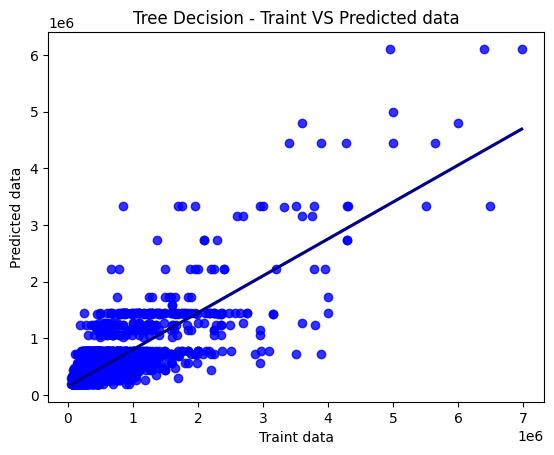

In [18]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_train, y=tr2, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Tree Decision - Traint VS Predicted data', ylabel='Predicted data', xlabel='Traint data')

# Random Forest (or Bootstrap Aggregation)

In [5]:
# making object of RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
# fitting the model
model_rf.fit(X_train, y_train) 


d:\Cesar\BeCode\Projects\immo-eliza-data-analysis\immo-eliza-data-analysis-env\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)

In [10]:
import pickle

filename = "../models/immo_model.pickle"

# save model
pickle.dump(model_rf, open(filename, "wb"))


In [10]:
# predition with training data 
pred_train= model_rf.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= model_rf.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = RegressorModels.get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)

Train: Score: 0.95
Train: Mean Squared Error: 91642.45595207531
Train: Root Mean Squared Error: 91642.45595207531
Train: Mean Absolute Error:  42008.40912339259
______________________________________
Test: Score: 0.67
Test: Mean Squared Error: 230906.55052415308
Test: Root Mean Squared Error: 230906.55052415308
Test: Mean Absolute Error:  110526.42835649077


[Text(0.5, 1.0, 'Random Forest - Test VS Predicted data'),
 Text(0, 0.5, 'Predicted data'),
 Text(0.5, 0, 'Test data')]

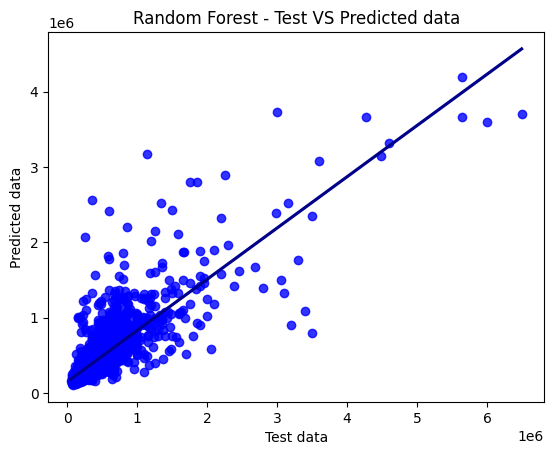

In [19]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Random Forest - Test VS Predicted data', ylabel='Predicted data', xlabel='Test data')